DATA DESCRIPTION

The objective of this notebook is to add the data from the "spaceship titanic" dataset and to make a quick analysis of it in order to understand the structure of the dataset and its essence.

1. Data ingestion.

The data is already divided into "test" and "train". However, we want to know more information about the dataset, we will combine both in one file.

In [7]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# BRING DATASETS
test = pd.read_csv("../data/processed/test.csv")
test_Y = pd.read_csv("../data/raw/sample_submission.csv")
df2 = pd.read_csv("../data/processed/train.csv")

# MERGE DATASETS
df1 = pd.merge(test,test_Y,on="PassengerId")
total_data = pd.concat([df1, df2], ignore_index=True)

2. Stats description.

We count with the complete dataset, so we will analyze it in order to extract some conclusions. 

2.1. General information

In [8]:
total_data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False


In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 1.3+ MB


The dataset counts with 12.970 rows and 14 columns. We can divide them in 3 groups apart from the target variable:

<small> 

1. Passenger id: This include information about the passenger like its name and Id.
    
    1.1. PassengerId (object) - has the ID of the pasenger.

    1.2. Name (object) - name of the passenger.

2. Travel record: This group includes information about the passenger's stay in the spaceship.

    2.1. Cabin (object) - cabin code.

    2.2. Age (float) - age of the passenger.

    2.3. Destination (obejct) - planet of destination.

    2.4. HomePlanet (object) - has the homeplanet of the passenger. 

    2.5. CryoSleep (object) - is in cryosleep or not.

    2.6. VIP (object) - is the passenger VIP or not.

3. Travel purchases: This group includes information about the passenger's purchases in the spaceship.

    3.1. RoomService (float) - The amount of money spent in room service. 

    3.2. FoodCourt (float) - The amount of money spent in the food court. 

    3.3. ShoppingMall (float) - The amount of money spent in the shopping mall.

    3.4. Spa (float) - The amount of money spent in the spa. 

    3.5. VRDeck (float) - the amount of money spent in the VRDeck.

TARGET VARAIBLE: Transported (boolean) - This variable is the objective and informs if the passenger has been transported or not. </small>

In [10]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.0,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.0,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.0,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.0,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.0,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.0,24133.0


The description shows that te majority of the passengers are under 38 years and spends almost no money during their trip.

2.2. Duplicates

In [11]:
# Duplicates
print(f"This dataset has a total of {total_data.duplicated().sum()} duplicates.")

This dataset has a total of 0 duplicates.


2.3. Data distribution

In order to know if there are columns with mistakes, the data distribution will be displayed.

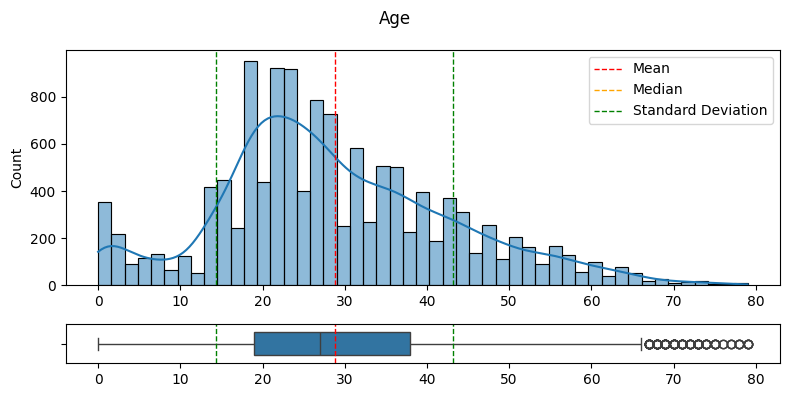

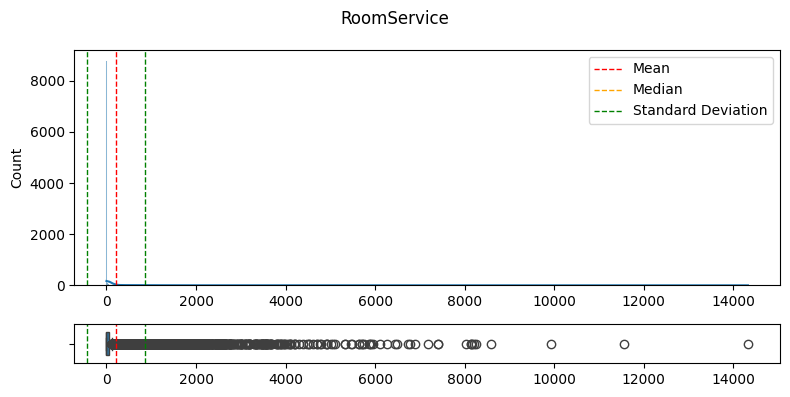

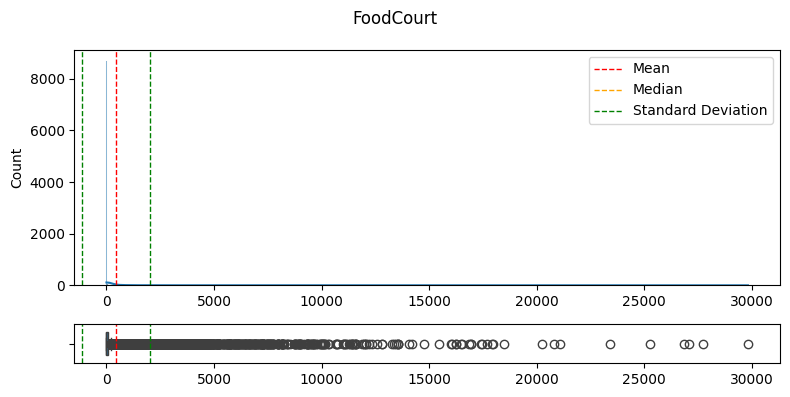

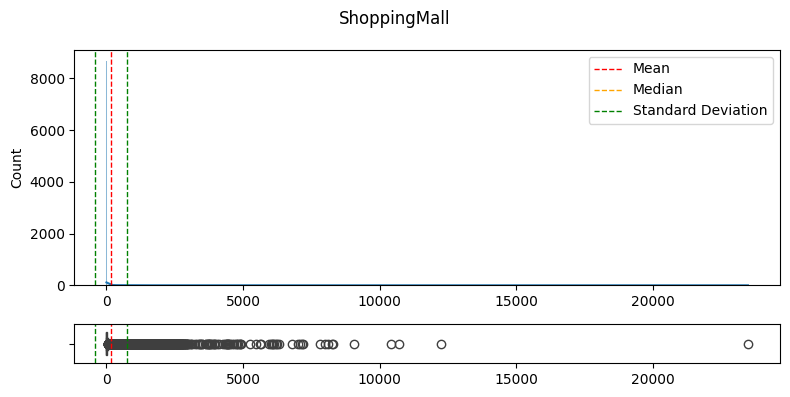

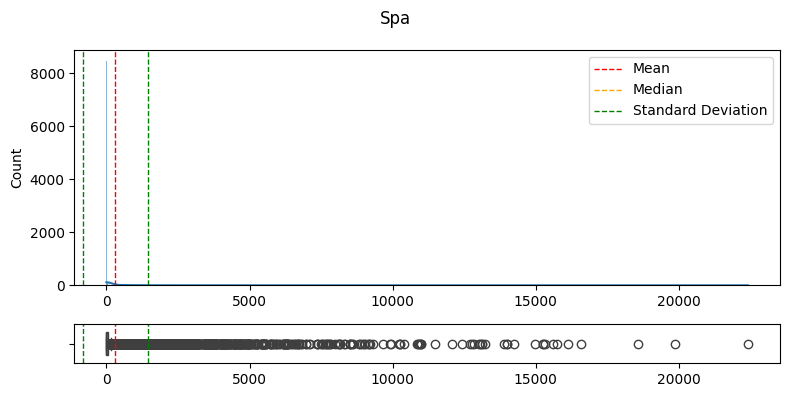

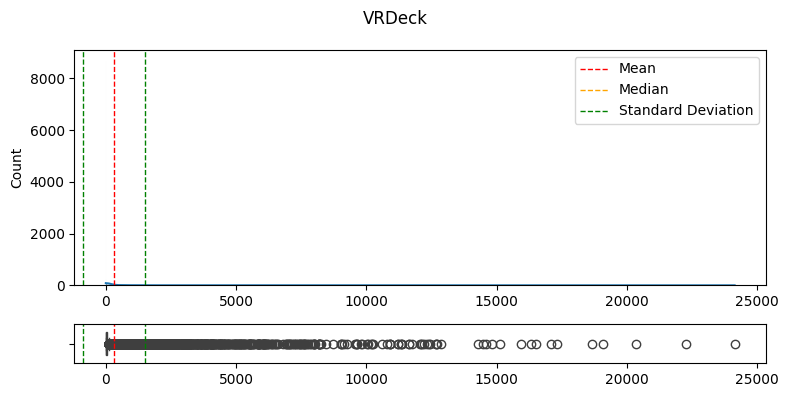

In [12]:
# Plot numerical variables to see values distribution (mean, median, std, outliers)
def plot_numerical_data(dataframe):
    numerical_columns = dataframe[['Age',
                                   'RoomService',
                                   'FoodCourt',
                                   'ShoppingMall', 
                                   'Spa', 
                                   'VRDeck'
    ]].columns

    for column in numerical_columns:
        fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]}) 
        # Calculate mean, median, and standard deviation
        mean_val = np.mean(dataframe[column])
        median_val = np.median(dataframe[column])
        std_dev = np.std(dataframe[column])

        # Create a multiple subplots with histograms and box plots
        sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
        axis[0].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[0].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[0].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1, label='Standard Deviation')
        axis[0].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        sns.boxplot(ax=axis[1], data=dataframe, x=column, width=0.6).set(xlabel=None)
        axis[1].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[1].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[1].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1)
        axis[1].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        axis[0].legend()  
        fig.suptitle(column)
        plt.tight_layout()
        plt.show()

plot_numerical_data(total_data)

According to the data displayed, it seems that the outliers present in the dataset correspond to the statistical outlier category. This means that although they are considered outliers, they are not errors.

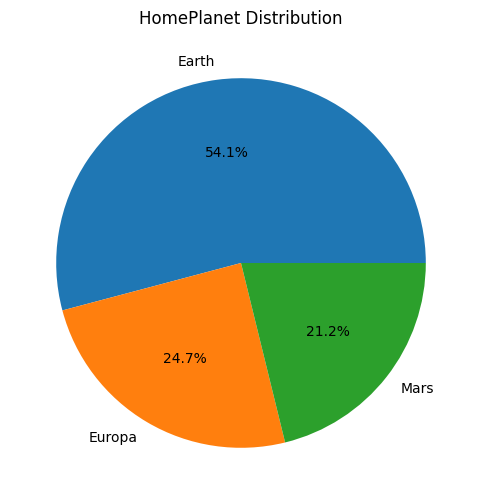

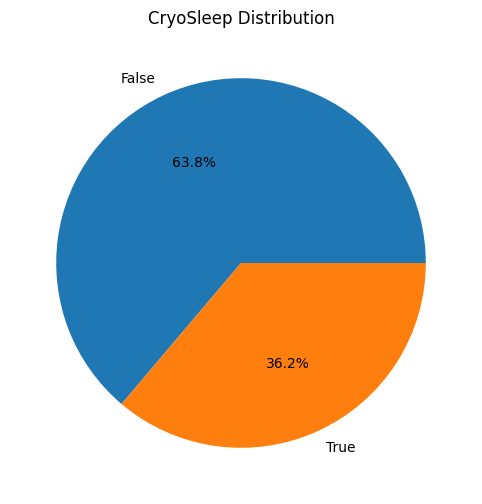

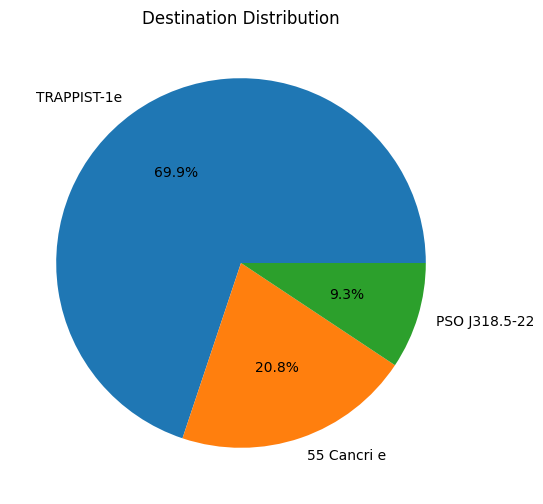

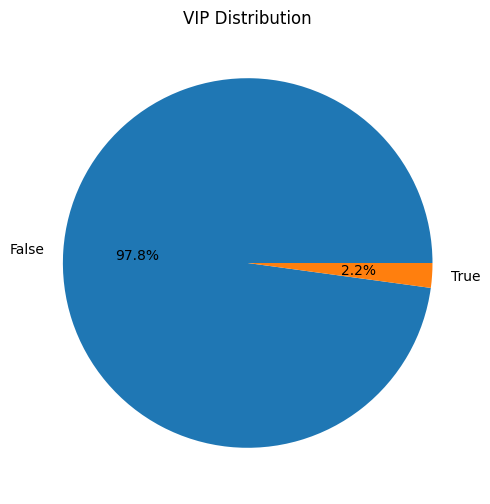

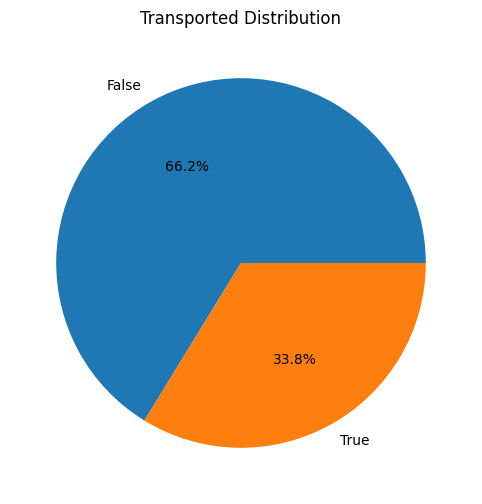

In [15]:
cat_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
for var in cat_variables:
    plt.figure(figsize=(10,6))
    plt.pie(x=total_data[var].value_counts(), 
            labels=total_data[var].value_counts().index, 
            autopct="%1.1f%%")
    plt.title(var+" "+"Distribution")
    plt.show()

This chart shows that the distribution of the variables are normal and that there are not wrong categories.

2.4. Drop irrelevant columns

The columns with irrelevant data for the machine learning model will be dropped. 

In [8]:
# drop id-realted columns
total_data = total_data.drop(['PassengerId', 'Name'], axis=1)
total_data.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False


Next, the dataset will be saved so it can be used in the exploratory data analysis.

In [9]:
total_data.to_csv('../data/interim/eda_total_data.csv',index=False)

**2.5. CONCLUSIONS**

- **Dataset Overview**:
  - Total rows: 12,970
  - Total columns: 14

- **Groups of Variables**:
  1. **Passenger ID**: Includes information about the passenger's name and ID.
  2. **Travel Record**: Includes information about the passenger's stay in the spaceship.
  3. **Travel Purchases**: Includes information about the passenger's purchases in the spaceship.

- **Target Variable**:
  - **Transported**: Boolean variable indicating if the passenger has been transported or not.

- **Key Observations**:
  - Majority of the passengers are under 38 years old.
  - Most passengers spend almost no money during their trip.
  - Approximately 40% of the passengers are in cryosleep.
  - Less than 0.025% of the passengers are VIP.

- **Data Quality**:
  - No duplicates in the dataset.
  - Missing information in some variables.
